In [1]:
import time
import urllib
import os.path
import sys
import os
import numpy as np
import matplotlib.pylab as plt
from os import listdir
import numpy as np
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
path = os.path.join(os.getcwd(), "archive\Training")
images = []
classifiers = []
useGlioma = False #Do you want to use the glioma tumor data? The test set is very flawed for reasons described in the paper.
depth = 50
if(useGlioma):
    depth = 15

In [3]:
#Preprocesses glioma tumors
gliomaPath = os.path.join(path, 'glioma_tumor')
if useGlioma:
    files = os.listdir(gliomaPath)
    for file in files:
        try:
            with Image.open(gliomaPath + '\\' + file).convert('L') as image:
                image = image.resize((200, 200))
                images.append(np.asarray(image).flatten())
                image = image.rotate(90)
                images.append(np.asarray(image).flatten())
                image = image.rotate(90)
                images.append(np.asarray(image).flatten())
                image = image.rotate(90)
                images.append(np.asarray(image).flatten())
                classifiers.append(3)
                classifiers.append(3)
                classifiers.append(3)
                classifiers.append(3)
        except FileNotFoundException:
            print(file)
            break
            
#Preprocesses meningioma tumors
meningPath = os.path.join(path, 'meningioma_tumor')
files = os.listdir(meningPath)
for file in files:
    try:
        with Image.open(meningPath + '\\' + file).convert('L') as image:
            image = image.resize((200, 200))
            images.append(np.asarray(image).flatten())
            classifiers.append(2)
    except FileNotFoundException:
        print(file)
        break
        
#Preprocesses no tumor data
noTumorPath = os.path.join(path, 'no_tumor')
files = os.listdir(noTumorPath)
for file in files:
    try:
        with Image.open(noTumorPath + '\\' + file).convert('L') as image:
            image = image.resize((200, 200))
            images.append(np.asarray(image).flatten())
            classifiers.append(0)
    except FileNotFoundException:
        print(file)
        break
        
#Preprocesses pituitary tumors
pituitaryPath = os.path.join(path, 'pituitary_tumor')
files = os.listdir(pituitaryPath)
for file in files:
    try:
        with Image.open(pituitaryPath + '\\' + file).convert('L') as image:
            image = image.resize((200, 200))
            images.append(np.asarray(image).flatten())
            image = image.rotate(90)
            images.append(np.asarray(image).flatten())
            image = image.rotate(90)
            images.append(np.asarray(image).flatten())
            image = image.rotate(90)
            images.append(np.asarray(image).flatten())
            classifiers.append(1)
            classifiers.append(1)
            classifiers.append(1)
            classifiers.append(1)
    except FileNotFoundException:
        print(file)
        break

In [4]:
rf = RandomForestClassifier(max_depth = depth, random_state = 912983)

In [5]:
rf.fit(images, classifiers)

RandomForestClassifier(max_depth=50, random_state=912983)

In [6]:
#Preprocesses all testing data.
path = os.path.join(os.getcwd(), "archive\Testing")
testImages = []
testClassifiers = []

if useGlioma:
    gliomaPath = os.path.join(path, 'glioma_tumor')
    files = os.listdir(gliomaPath)
    for file in files:
        try:
            with Image.open(gliomaPath + '\\' + file).convert('L') as image:
                image = image.resize((200,200))
                testImages.append(np.asarray(image).flatten())
                testClassifiers.append(3)
        except FileNotFoundException:
            print(file)
            break
        
meningPath = os.path.join(path, 'meningioma_tumor')
files = os.listdir(meningPath)
for file in files:
    try:
        with Image.open(meningPath + '\\' + file).convert('L') as image:
            image = image.resize((200,200))
            testImages.append(np.asarray(image).flatten())
            testClassifiers.append(2)
    except FileNotFoundException:
        print(file)
        break
        
noTumorPath = os.path.join(path, 'no_tumor')
files = os.listdir(noTumorPath)
for file in files:
    try:
        with Image.open(noTumorPath + '\\' + file).convert('L') as image:
            image = image.resize((200,200))
            testImages.append(np.asarray(image).flatten())
            testClassifiers.append(0)
    except FileNotFoundException:
        print(file)
        break
        
pituitaryPath = os.path.join(path, 'pituitary_tumor')
files = os.listdir(pituitaryPath)
for file in files:
    try:
        with Image.open(pituitaryPath + '\\' + file).convert('L') as image:
            image = image.resize((200,200))
            testImages.append(np.asarray(image).flatten())
            testClassifiers.append(1)
    except FileNotFoundException:
        print(file)
        break

In [7]:
rf.score(testImages, testClassifiers) #Outputs accuracy

0.9489795918367347

(array([114.,  62., 118.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

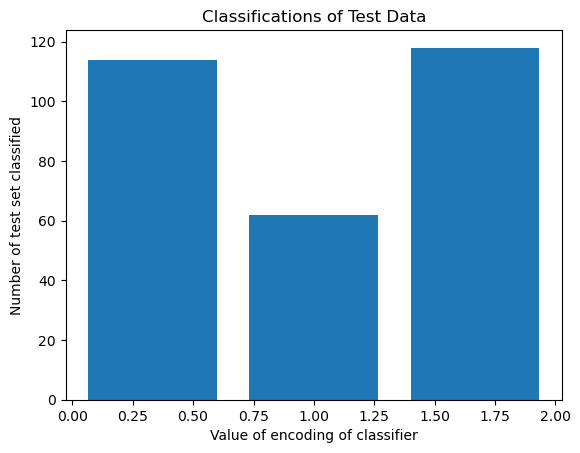

In [8]:
plt.xlabel('Value of encoding of classifier')
plt.ylabel('Number of test set classified')
plt.title('Classifications of Test Data')
bins = 3
if useGlioma:
    bins = 4
plt.hist(rf.predict(testImages), bins = bins, rwidth = 0.8) 

In [9]:
rf.predict(testImages)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1])